In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#importing data
data=pd.read_csv("C:/Recent Download/Train.csv")
data1=pd.read_csv('C:/Recent Download/Test.csv')

In [3]:
#Top 5 data points 
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Missing Values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see that there are missing values in data(Item_Weight,Outlet_Size).Implementing mean value in place of missing values

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#For numerical variable import mean
data['Item_Weight']=data['Item_Weight'].mean()
data.fillna(data['Item_Weight'].mean())
#For categorical variable import mode
data['Outlet_Size']=data['Outlet_Size'].mode()[0]
data.fillna(data['Outlet_Size'].mode())
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now there are no missing values in the data set

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
DRN47     9
NCJ30     9
NCF42     9
         ..
FDC23     1
FDE52     1
FDK57     1
FDT35     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Converting LF and low fat into Low Fat and reg into Regular

In [11]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#Converting the categorical into numerical values 
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,12.857645,0,0.016047,4,249.8092,9,1999,0,0,1,3735.1380
1,8,12.857645,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228
2,662,12.857645,0,0.016760,10,141.6180,9,1999,0,0,1,2097.2700
3,1121,12.857645,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,12.857645,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


We have successfully converted categorical data into numerical

Text(0.5, 1.0, 'Sale Acc Item')

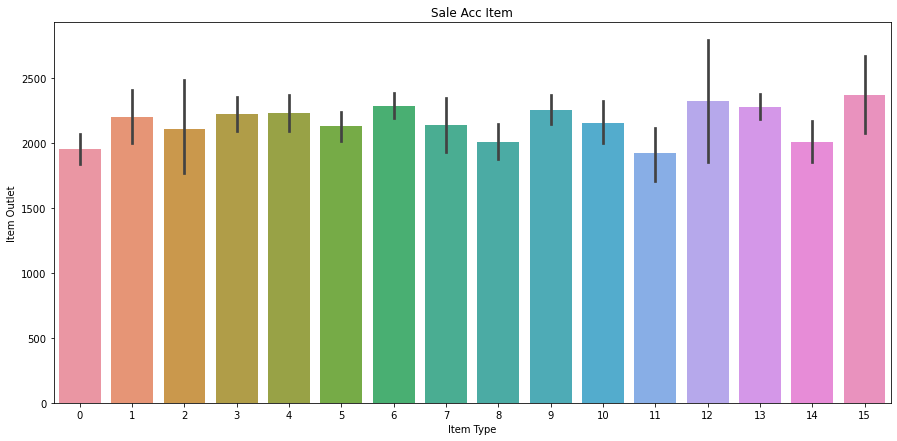

In [14]:
#Sales Acc to Type of Item 
plt.figure(figsize=(15,7))
sns.barplot(x=data['Item_Type'],y=data['Item_Outlet_Sales'])
plt.xlabel('Item Type')
plt.ylabel('Item Outlet')
plt.title('Sale Acc Item')

In [15]:
data['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

From the illustration above, we can tell items like fruits and vegetables, household goods, snacks, starchy foods and seafood are more sold than the other items so the mall should consider keeping more of these items in inventory, give special offers and discounts to these goods so volume of sales increases more.



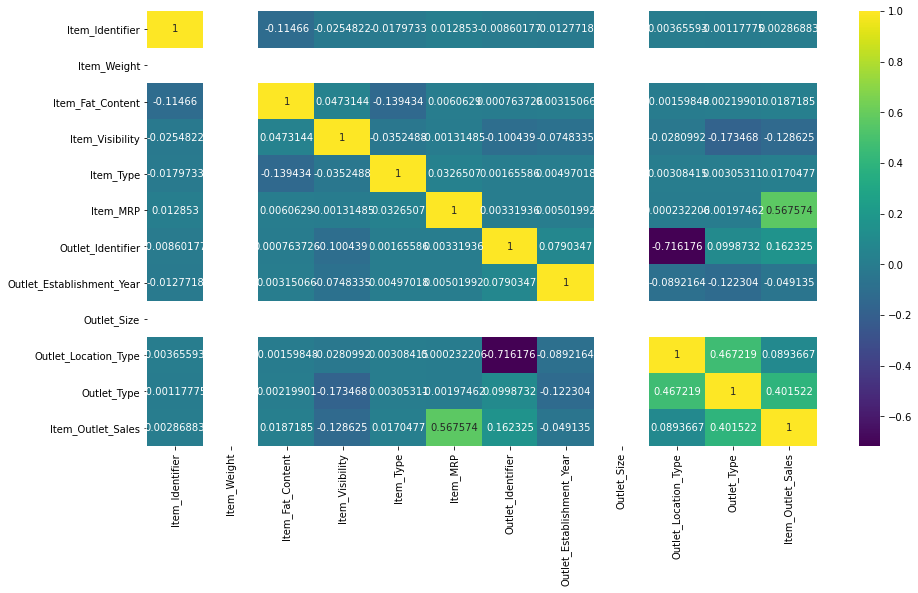

In [16]:
corr=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt="g", cmap='viridis')
plt.show()



When MRP of the item increases sales increases.There is not much correlation between other the columns.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

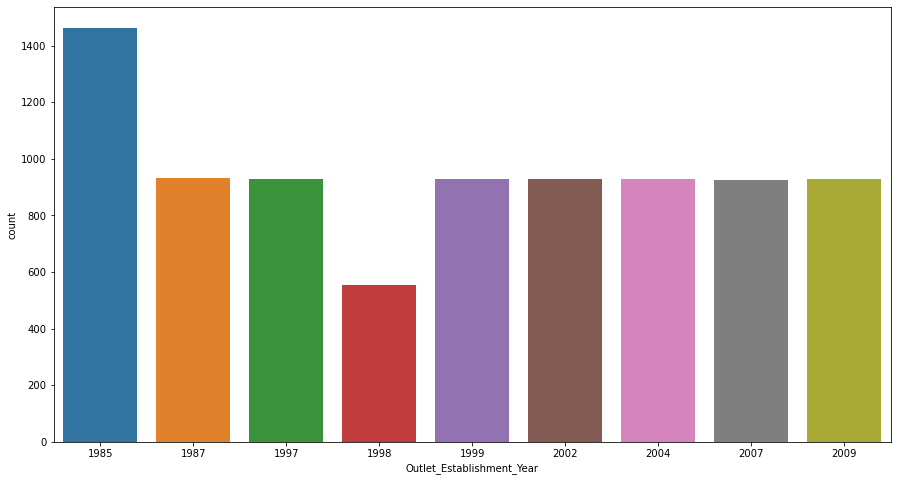

In [17]:
#Looking Sales out after  Establishment Year
plt.figure(figsize=(15,8))
sns.countplot(x='Outlet_Establishment_Year',data=data)

It is seen that Salses were more in the starting year 1985 and been decreased after that

In [18]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
data['Item_MRP'].nlargest()

4802    266.8884
5884    266.8884
4159    266.6884
5254    266.6884
4538    266.5884
Name: Item_MRP, dtype: float64

Largest MRP of item is 266

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

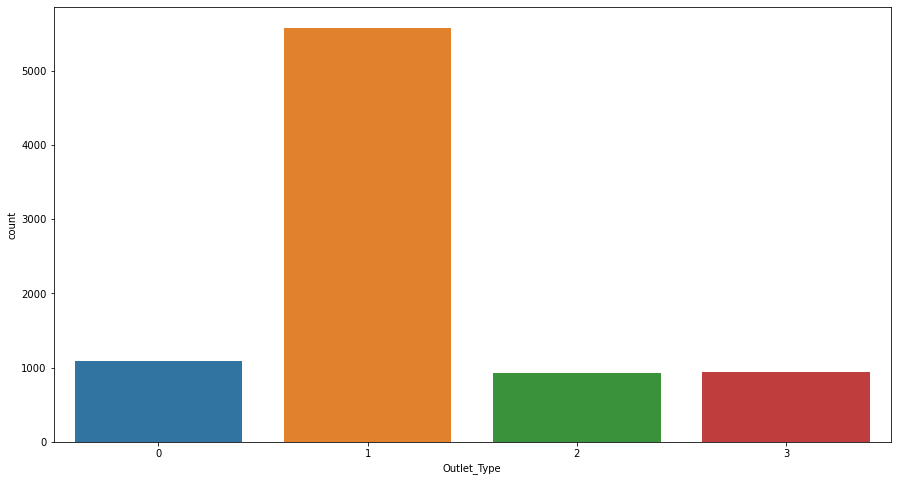

In [20]:
#Sales in which outlet type
plt.figure(figsize=(15,8))
sns.countplot(x='Outlet_Type',data=data)

Most of the sales is done in Supermarket Type 1(Tier=1)

In [21]:
#Splitting data
from sklearn.model_selection import train_test_split
# We need to split the data
X = data.drop(columns='Item_Outlet_Sales',axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = data['Item_Outlet_Sales'] # Target

# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.


In [22]:
data.shape

(8523, 12)

In [23]:
X_train.shape

(6818, 11)

In [26]:
#Creating model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [27]:
#Creating submodels
estimators=[]
model1=DecisionTreeRegressor()
estimators.append(('cart',model1))
model2=SVR()
estimators.append(('svm',model2))
model3=XGBRegressor()
estimators.append(('xgboost',model3))




In [28]:
#create the ensemble model
ensemble=VotingRegressor(estimators)


In [29]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(ensemble,X,y)

In [32]:
print(result.mean())


0.454874646173682


In [33]:
model1 = XGBRegressor()

# Now we need to train the model
model1.fit(X_train,y_train) # fitting means training

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [35]:
train_pred1 = model1.predict(X_train)
train_pred1


array([2430.1602, 2675.644 , 4004.7117, ..., 3148.4458, 1762.9177,
       1750.6729], dtype=float32)

In [36]:
train_pred2 = model2.predict(X_train)
train_pred2


array([2436.48245933, 3126.34086666, 3955.70074624, ..., 2488.17201026,
       2266.73177327, 3038.42044008])

In [38]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)
from sklearn import metrics
# For XGBRegressor
RSQscore1 = metrics.r2_score(y_train,train_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 


R squared error for XGB Regressor: 0.8488848609068753


In [39]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_train,train_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 


R squared error for Linear Regressor: 0.5056464344338085


In [40]:
test_pred1 = model1.predict(X_test)
test_pred1


array([2419.886 , 3431.421 , 1341.457 , ..., 2581.3816, 1689.9258,
       3351.5078], dtype=float32)

In [41]:
test_pred2 = model2.predict(X_test)
test_pred2

array([2583.8760306 , 3661.1523555 , 1167.94814094, ..., 2137.90249931,
       4575.75707178, 3477.83839901])

In [42]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_test,test_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 


R squared error for XGB Regressor: 0.5376898974514046


In [43]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_test,test_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 


R squared error for Linear Regressor: 0.48733677930809927


so linear regression is best for the data